# __CAS KAGGLE: Website Classification__

##### Marina Vázquez Guerrero

###### NIU: 1563735

In [2]:
# impotem les llibreries i els paquets que necessitem
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score,accuracy_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(10,10))
sns.set(style="darkgrid")
%matplotlib inline

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
# llegim la base de dades

# https://www.kaggle.com/hetulmehta/website-classification
data = pd.read_csv("website_classification.csv")
data

,Unnamed: 0,website_url,cleaned_website_text,Category
0,0,https://www.booking.com/index.html?aid=1743217,official site good hotel accommodation big sav...,Travel
1,1,https://travelsites.com/expedia/,expedia hotel book sites like use vacation wor...,Travel
2,2,https://travelsites.com/tripadvisor/,tripadvisor hotel book sites like previously d...,Travel
3,3,https://www.momondo.in/?ispredir=true,cheap flights search compare flights momondo f...,Travel
4,4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,bot create free account create free account si...,Travel
...,...,...,...,...
1403,1403,http://www.oldwomen.org/,old nude women porn mature granny sex horny ol...,Adult
1404,1404,http://www.webcamslave.com,bdsm cams bdsm chat bondage cams free bdsm vid...,Adult
1405,1405,http://www.buyeuroporn.com/,porno dvd online european porn dvd cheap adult...,Adult
1406,1406,http://www.analdreamhouse.com/30/03/agecheck/i...,anal dream house anal dream house anal dream h...,Adult


In [4]:
data.shape

(1408, 4)

Visualització de la base de dades

In [4]:
# Fem una visualització de les primeres files per a veure de forma clara quina forma té la base de dades
data.head()

,Unnamed: 0,website_url,cleaned_website_text,Category
0,0,https://www.booking.com/index.html?aid=1743217,official site good hotel accommodation big sav...,Travel
1,1,https://travelsites.com/expedia/,expedia hotel book sites like use vacation wor...,Travel
2,2,https://travelsites.com/tripadvisor/,tripadvisor hotel book sites like previously d...,Travel
3,3,https://www.momondo.in/?ispredir=true,cheap flights search compare flights momondo f...,Travel
4,4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,bot create free account create free account si...,Travel


In [5]:
# Veiem que és insignificant l'atribut "Unnamed: 0" ja que només és l'índex de la fila del data
data.drop(["Unnamed: 0"], axis=1, inplace=True)

#També, el url de la web no ens aporta informació
data.drop(["website_url"], axis=1, inplace=True)

In [6]:
# Comprovem si hi ha NAN's en la nostra base de dades
data.isnull().sum()
# Veiem que no hi ha cap característica amb NAN's

cleaned_website_text    0
Category                0
dtype: int64

In [7]:
#Mirem de quins tipus són els atibuts que tenim
display(data.dtypes)
# Veiem que tots els atributs no són de tipus int, per tant, hem de transformar-los a ints

cleaned_website_text    object
Category                object
dtype: object

In [8]:
# creem una variable per a codificar les categories de cada web amb números enlloc d'etiquetes
le = LabelEncoder()
data["target_category"] = le.fit(data["Category"]).transform(data["Category"])
data
# Ara tenim un atribut més on les categories estan expressades amb números i no objectes

,cleaned_website_text,Category,target_category
0,official site good hotel accommodation big sav...,Travel,15
1,expedia hotel book sites like use vacation wor...,Travel,15
2,tripadvisor hotel book sites like previously d...,Travel,15
3,cheap flights search compare flights momondo f...,Travel,15
4,bot create free account create free account si...,Travel,15
...,...,...,...
1403,old nude women porn mature granny sex horny ol...,Adult,0
1404,bdsm cams bdsm chat bondage cams free bdsm vid...,Adult,0
1405,porno dvd online european porn dvd cheap adult...,Adult,0
1406,anal dream house anal dream house anal dream h...,Adult,0


In [12]:
#Mirem de quins tipus són els atibuts que tenim ara
display(data.dtypes)
# Veiem que tots els atributs no són de tipus int, per tant, hem de transformar-los a ints

website_url             object
cleaned_website_text    object
Category                object
target_category          int32
dtype: object

In [6]:
# Per a saber quines són les etiquetes reals dels números codificats anteriorment, podem fer la inversa
le.inverse_transform(data["target_category"])

array(['Travel', 'Travel', 'Travel', ..., 'Adult', 'Adult', 'Adult'],
      dtype=object)

In [9]:
# convertim en string la columna de cleaned_website_text
data["cleaned_website_text"] = data["cleaned_website_text"].astype(str)

In [12]:
# volem poder tractar amb les descripcions per això, utilitzem el CountVectorizer
cv = CountVectorizer(analyzer = "word", stop_words = "english")
cv.fit(data["cleaned_website_text"])

CountVectorizer(stop_words='english')

In [13]:
data['target_category'].value_counts()

4     114
1     109
15    107
14    105
13    104
3     102
7      98
8      96
10     96
2      93
11     93
5      92
9      84
12     83
0      16
6      16
Name: target_category, dtype: int64

In [14]:
data['Category'].value_counts()

Education                          114
Business/Corporate                 109
Travel                             107
Streaming Services                 105
Sports                             104
E-Commerce                         102
Games                               98
Health and Fitness                  96
News                                96
Computers and Technology            93
Photography                         93
Food                                92
Law and Government                  84
Social Networking and Messaging     83
Adult                               16
Forums                              16
Name: Category, dtype: int64

In [1]:
# Fem un diccionari de manera que ens faciliti entendre les categories numèriques
dic_category = {'Adult' : 0, 'Business/Corporate' : 1, 'Computers and Technology' : 2, 'E-Commerce' : 3 , 'Education' : 4, 'Food' : 5, 'Forums' : 6, 'Games' : 7,
      'Health and Fitness' : 8, 'Law and Government' : 9, 'News' : 10, 'Photography' : 11, 'Social Networking and Messaging' : 12, 'Sports' : 13, 'Streaming Services' : 14,
                'Travel' :15}

La part X que hem d'utilitzar és el data["cleaned_website_text"].
Les prediccions són les categories dels diferents links

In [22]:
# Ens quedem amb el que ens interessa; netejem la base de dades
data.drop(["Category"], axis=1, inplace=True)

Visualitzem la base de dades amb la qual ara treballarem

In [23]:
data

,cleaned_website_text,target_category
0,official site good hotel accommodation big sav...,15
1,expedia hotel book sites like use vacation wor...,15
2,tripadvisor hotel book sites like previously d...,15
3,cheap flights search compare flights momondo f...,15
4,bot create free account create free account si...,15
...,...,...
1403,old nude women porn mature granny sex horny ol...,0
1404,bdsm cams bdsm chat bondage cams free bdsm vid...,0
1405,porno dvd online european porn dvd cheap adult...,0
1406,anal dream house anal dream house anal dream h...,0


### Visualització dels atributs a predir

Text(0, 0.5, 'Count')

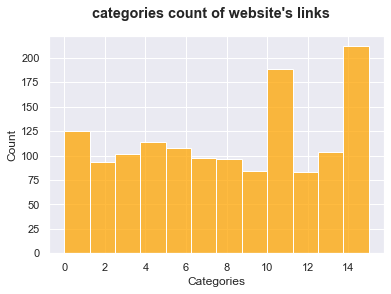

In [24]:
# historgrama del target_category per a veure com estan organitzats

p=sns.histplot(data=data, x="target_category", kde=False, color="orange")

plt.suptitle("categories count of website's links",
             fontsize = 'x-large', fontweight = 'bold' )
p.set_xlabel("Categories")
p.set_ylabel("Count")

#plt.savefig("hist_target_A.png", dpi = 300, bbox_inches = 'tight')